In [2]:
# --- QUICK SETUP: Recreate arrest_by_area ---
import pandas as pd

# Load the Cleaned Crime Data again
crime_df = pd.read_csv('../data/CleanedCrime.csv')

# Group by Community Area
arrest_by_area = crime_df.groupby('Community Area').agg(
    total_crimes=('Date', 'count'),
    total_arrests=('Arrest', 'sum')
).reset_index()

# Calculate Arrest Rate
arrest_by_area['arrest_rate'] = arrest_by_area['total_arrests'] / arrest_by_area['total_crimes']

print("Arrest_by_area recreated:")
print(arrest_by_area.head())


Arrest_by_area recreated:
   Community Area  total_crimes  total_arrests  arrest_rate
0             0.0            59              8     0.135593
1             1.0        109350          28723     0.262670
2             2.0         90609          14721     0.162467
3             3.0        103778          30635     0.295197
4             4.0         50640           8948     0.176698


   Community Area  total_crimes  total_arrests  arrest_rate
0             0.0            59              8     0.135593
1             1.0        109350          28723     0.262670
2             2.0         90609          14721     0.162467
3             3.0        103778          30635     0.295197
4             4.0         50640           8948     0.176698

Top 10 Over-Performing Community Areas (Highest Arrest Rates):
    Community Area  arrest_rate
26       26.000000     0.436469
27       27.000000     0.385411
25       25.000000     0.377022
23       23.000000     0.376494
29       29.000000     0.372746
35       35.000000     0.348461
37       37.000000     0.347551
62       61.000000     0.325442
38       37.484723     0.321550
33       33.000000     0.306609

Bottom 10 Under-Performing Community Areas (Lowest Arrest Rates):
    Community Area  arrest_rate
17            17.0     0.155688
75            74.0     0.155550
42            41.0     0.143174
18            18.0     0.1429

/var/folders/fc/fs9j8_5j73v0dccgsvwrdxmc0000gn/T/ipykernel_15389/2565738667.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(top10['Community Area'].astype(str), rotation=45)
/var/folders/fc/fs9j8_5j73v0dccgsvwrdxmc0000gn/T/ipykernel_15389/2565738667.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(bottom10['Community Area'].astype(str), rotation=45)


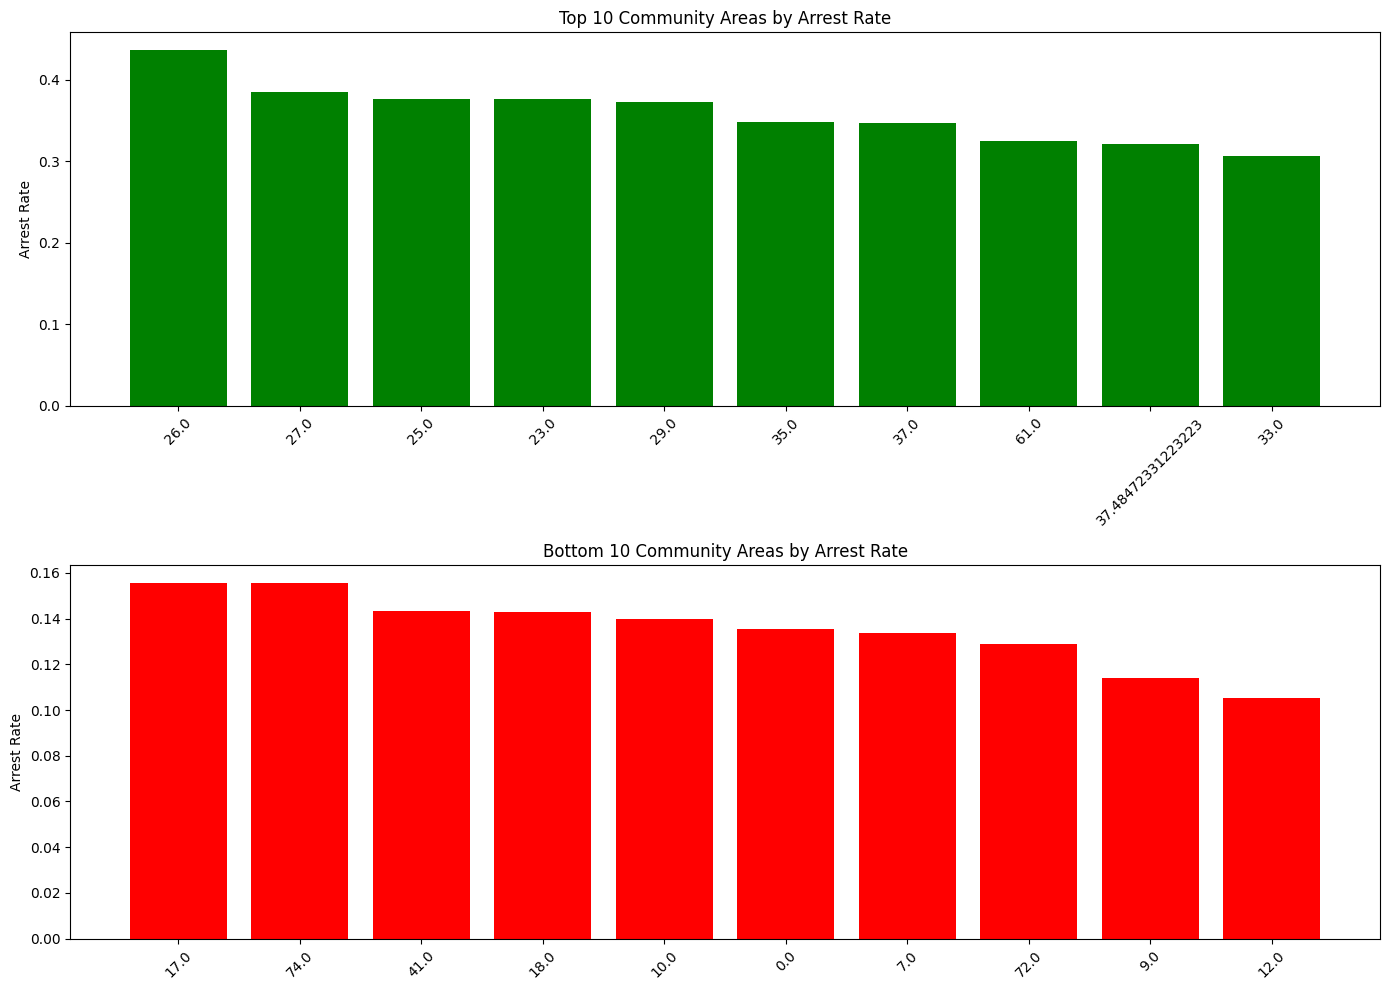

In [3]:
# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt

# --- Load Arrest Rate Data ---
# Assume you already have arrest_by_area from 01
# Otherwise re-load it if you saved it

# --- If needed: Load it again ---
# arrest_by_area = pd.read_csv('../data/arrest_by_area.csv')

# --- Quick Preview ---
print(arrest_by_area.head())

# --- Sort Areas by Arrest Rate ---
sorted_areas = arrest_by_area.sort_values('arrest_rate', ascending=False)

# --- Top 10 Over-Performers ---
top10 = sorted_areas.head(10)
print("\nTop 10 Over-Performing Community Areas (Highest Arrest Rates):")
print(top10[['Community Area', 'arrest_rate']])

# --- Bottom 10 Under-Performers ---
bottom10 = sorted_areas.tail(10)
print("\nBottom 10 Under-Performing Community Areas (Lowest Arrest Rates):")
print(bottom10[['Community Area', 'arrest_rate']])

# --- Optional: Plot Side-by-Side Barplots ---
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Top 10
ax[0].bar(top10['Community Area'].astype(str), top10['arrest_rate'], color='green')
ax[0].set_title('Top 10 Community Areas by Arrest Rate')
ax[0].set_ylabel('Arrest Rate')
ax[0].set_xticklabels(top10['Community Area'].astype(str), rotation=45)

# Bottom 10
ax[1].bar(bottom10['Community Area'].astype(str), bottom10['arrest_rate'], color='red')
ax[1].set_title('Bottom 10 Community Areas by Arrest Rate')
ax[1].set_ylabel('Arrest Rate')
ax[1].set_xticklabels(bottom10['Community Area'].astype(str), rotation=45)

plt.tight_layout()
plt.show()
